# Experiments with Nikita's formula

### Implementing function to compute L-value

$${L =\frac{\sqrt{\sum_{j=1}^{n}\sum_{i=1}^{n}(\sqrt{\sum_{k=i}^{j}{(a_{k}^{2}+b_{k}^{2}-c_{k}^{2}-d_{k}^{2}})^{2}+(\sum_{k=i}^{j}2(b_{k}c_{k}-a_{k}d_{k}))^{2}+(\sum_{k=i}^{j}2(a_{k}c_{k}+b_{k}d_{k}))^{2}}-\frac{\sum_{m=1}^{n}\sum_{p=1}^{n}(\sqrt{(\sum_{k=m}^{p}a_{k}^{2}+b_{k}^{2}-c_{k}^{2}-d_{k}^{2})^{2}+(\sum_{k=m}^{p}2(b_{k}c_{k}-a_{k}d_{k}))^{2}+(\sum_{k=m}^{p}2(a_{k}c_{k}+b_{k}d_{k}))^{2}})}{n(n-1)})^{2}}}{d_{londest}}}$$

In [1]:
import numpy
import math

In [2]:
def compute_L(knot):
    quat_arr = two_complex_to_quaternion(numpy.hstack(knot.initial_random_vectors))
    n = quat_arr.shape[0]
    
    
    acc_j=0
    for j in range(0,n):
        acc_i=0
        for i in range(0,n):            
            #(a^2+b^2+c^2+d^2)^2
            acc_k_0 = 0
            for k in range(i,j+1):
                acc_k_0 += quat_arr[k,0]**2+quat_arr[k,1]**2+quat_arr[k,2]**2+quat_arr[k,3]**2
            acc_k_0 = acc_k_0**2
            
            #(2(b*c-a*d))^2
            acc_k_1 = 0
            for k in range(i,j+1):
                acc_k_1 += quat_arr[k,1]*quat_arr[k,2]-quat_arr[k,0]*quat_arr[k,3]
            acc_k_1 = (2*acc_k_1)**2
            
            #(2(a*c+b*d))^2
            acc_k_2 = 0
            for k in range(i,j+1):
                acc_k_2 += quat_arr[k,0]*quat_arr[k,2]+quat_arr[k,1]*quat_arr[k,3]
            acc_k_2 = (2*acc_k_2)**2
            
            left_k = math.sqrt(acc_k_0+acc_k_1+acc_k_2)
            
            #right side of minus
            right_k = compute_right_k(quat_arr,n)
            
            acc_i+=left_k-right_k
        acc_j+=acc_i
        
    d_longest = compute_d_longest(knot)#numpy.max(quat_arr[:,3])
    return math.sqrt(acc_j**2)/d_longest

def compute_right_k(quat_arr,n):
    acc_m=0
    for m in range(0,n):
        acc_p=0
        for p in range(0,n):            
            #(a^2+b^2+c^2+d^2)^2
            acc_k_0 = 0
            for k in range(m,p+1):
                acc_k_0 += quat_arr[k,0]**2+quat_arr[k,1]**2+quat_arr[k,2]**2+quat_arr[k,3]**2
            acc_k_0 = acc_k_0**2
            
            #(2(b*c-a*d))^2
            acc_k_1 = 0
            for k in range(m,p+1):
                acc_k_1 += quat_arr[k,1]*quat_arr[k,2]-quat_arr[k,0]*quat_arr[k,3]
            acc_k_1 = (2*acc_k_1)**2
            
            #(2(a*c+b*d))^2
            acc_k_2 = 0
            for k in range(m,p+1):
                acc_k_2 += quat_arr[k,0]*quat_arr[k,2]+quat_arr[k,1]*quat_arr[k,3]
            acc_k_2 = (2*acc_k_2)**2
            
        acc_p+=math.sqrt(acc_k_0+acc_k_1+acc_k_2)
    acc_m+=acc_p
    return acc_m/(n*(n-1))

def compute_d_longest(knot):
    max_distance = 0
    for row_index in range(-1,knot.vertices.shape[0]-1):
        x1,y1,z1 = knot.vertices[row_index]
        x2,y2,z2 = knot.vertices[row_index+1]
        distance = math.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
        if distance>max_distance:
            max_distance = distance
    return max_distance

#### Trying to use the formula on a single knot

In [3]:
from Knot import Knot
from polygon_generation import two_complex_to_quaternion

Could not import cythonised chelpers, using Python alternative. This will give the same result, but is slower.


In [4]:
k=Knot(10)

Prepare knot data to be used by a function

In [5]:
quat = two_complex_to_quaternion(numpy.hstack(k.initial_random_vectors))
quat

array([[ 0.0657906 , -0.06049827,  0.00722672, -0.03619034],
       [-0.09868116, -0.05562064,  0.00206491, -0.00807604],
       [ 0.05596643,  0.08867505, -0.05095282,  0.03139652],
       [ 0.13405874, -0.1134954 ,  0.00210082, -0.05610541],
       [ 0.03220487, -0.09883504,  0.07741405,  0.11606762],
       [ 0.03148044,  0.06458276,  0.11264924, -0.11543953],
       [-0.03920339, -0.13563714,  0.19188068, -0.09307664],
       [-0.03390363,  0.05494245, -0.00180784,  0.04240316],
       [-0.03280326, -0.04151326,  0.0406739 ,  0.03401839],
       [ 0.11079335, -0.04610651, -0.04469728, -0.13247988]])

In [6]:
quat.shape

(10, 4)

In [7]:
compute_L(k)

12.450314150193758

### L vs Knot Emptiness correlation experiment

Trying to find a correlation between L-value and knot ID emptiness. First, generate a lot of knots, store their L-value and whether their ID was empty or not

In [8]:
number_of_knots = 100
stick_number = 10

In [10]:
empty=[]
non_empty=[]
for _ in range(0,number_of_knots):
    k=Knot(stick_number)    
    L=compute_L(k)
    if k.knot_ID == []:
        empty.append(L)
    else:
        non_empty.append(L)
print("Generated "+str(number_of_knots)+" knots: "+str(len(empty))+" of them were empty")

Generated 100 knots: 100 of them were empty


In [18]:
numpy.min(numpy.hstack((empty,non_empty)))

8.84323665806784

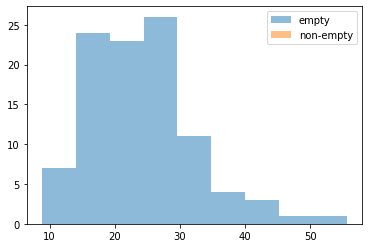

In [24]:
import numpy
from matplotlib import pyplot
%matplotlib inline

min_L = numpy.min(numpy.hstack((empty,non_empty)))
max_L = numpy.max(numpy.hstack((empty,non_empty)))
bins = numpy.linspace(min_L, max_L, 10)

pyplot.hist(empty, bins, alpha=0.5, label='empty')
pyplot.hist(non_empty, bins, alpha=0.5, label='non-empty')
pyplot.legend(loc='upper right')
pyplot.show()
